# HACKATHON TESLA 2024 - GDSC

***Dante Schrantz, Miguel Díaz Pérez de Juan***

⚠️ Leer el ReadMe añadido en la carpeta previamente a este script.

# **Importamos las librerías necesarias y conectamos con nuestro Drive** 📚

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importamos los datos de ficheros desde Drive


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/
!ls

train = pd.read_csv("Train_tesla.csv")
df_test = pd.read_csv("Test_tesla.csv")

print(train.head())
train.info()

/content/drive/MyDrive/Colab Notebooks
Comparacion.ipynb	logistic_regression_predictions.csv  train_tesla_cat.csv
final_hackathon2.csv	RandomForest.ipynb		     Train_tesla.csv
final_hackathon.csv	random_forest_predictions.csv	     Untitled
LinearRegression.ipynb	Test_tesla.csv			     Untitled0.ipynb
       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3   

# **VISUALIZACIÓN DE LOS DATOS, entendemos train.csv** 📊

# Mapa de calor de los datos nulos para una mejor visualizacion

<Axes: >

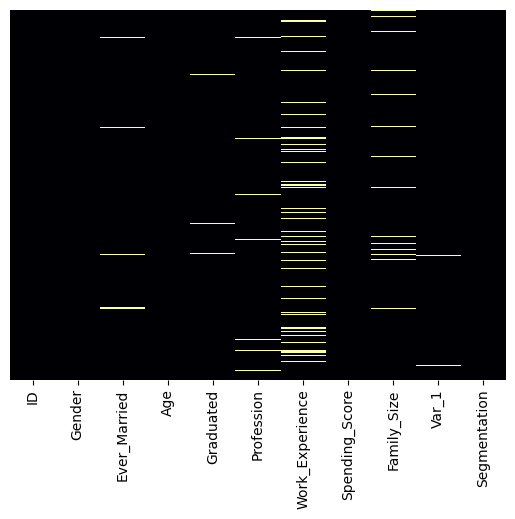

In [ ]:
train.isnull().tail()
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='inferno')

# Visualizamos algunos datos

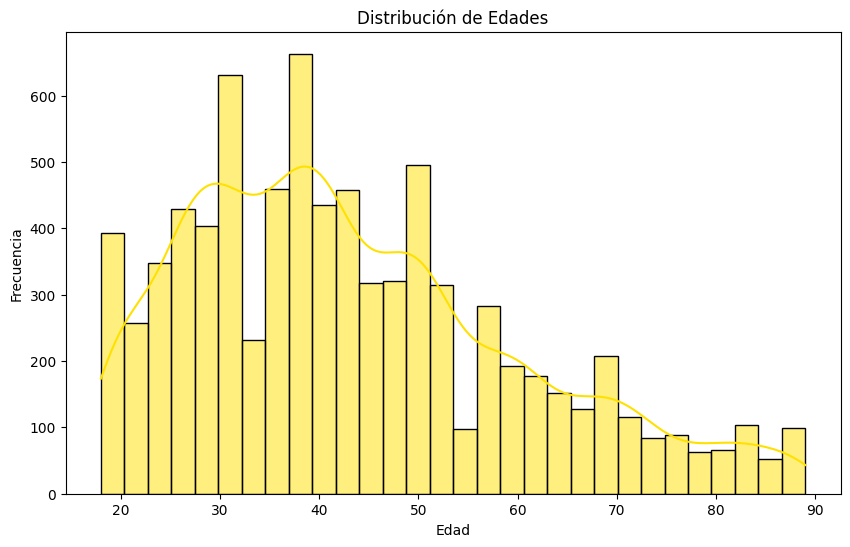

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], bins=30, kde=True, color='#ffe100')

plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()

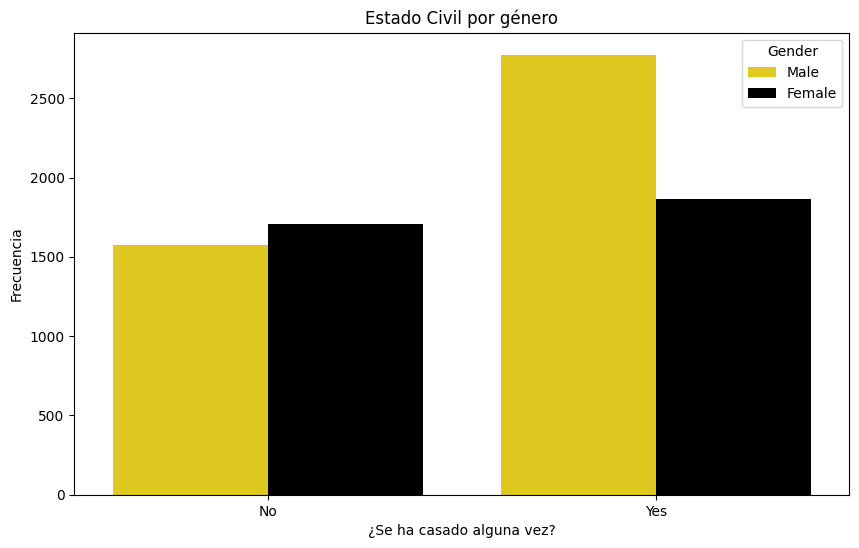

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Ever_Married', hue='Gender', data=train, palette = ['#ffe100', 'black'])
plt.title('Estado Civil por género')
plt.xlabel('¿Se ha casado alguna vez?')
plt.ylabel('Frecuencia')
plt.show()

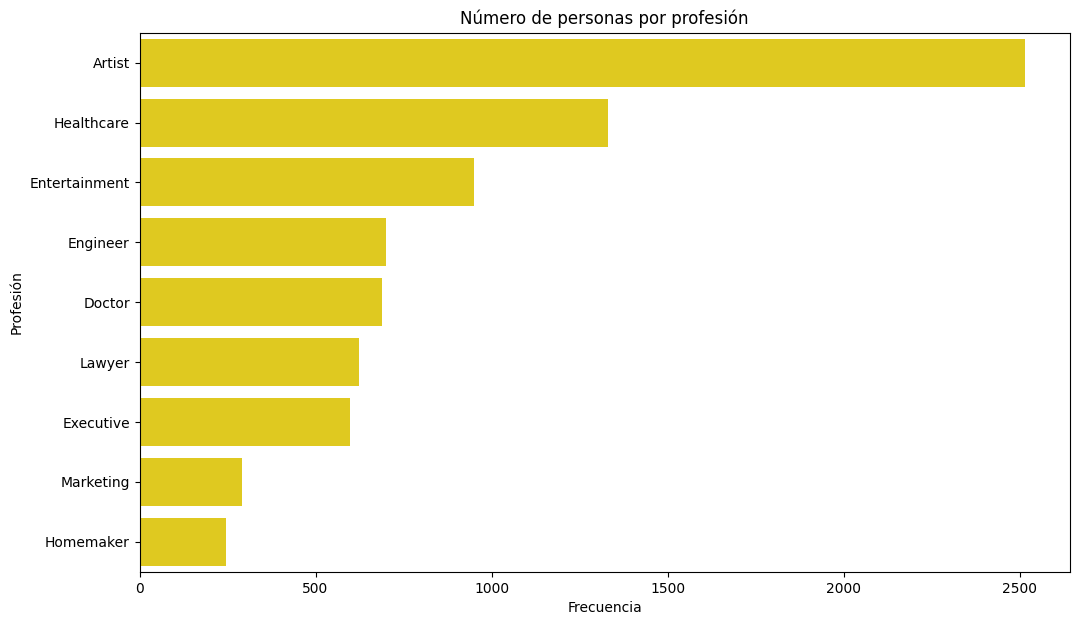

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(y='Profession', data=train, order=train['Profession'].value_counts().index, color='#ffe100')
plt.title('Número de personas por profesión')
plt.xlabel('Frecuencia')
plt.ylabel('Profesión')
plt.show()

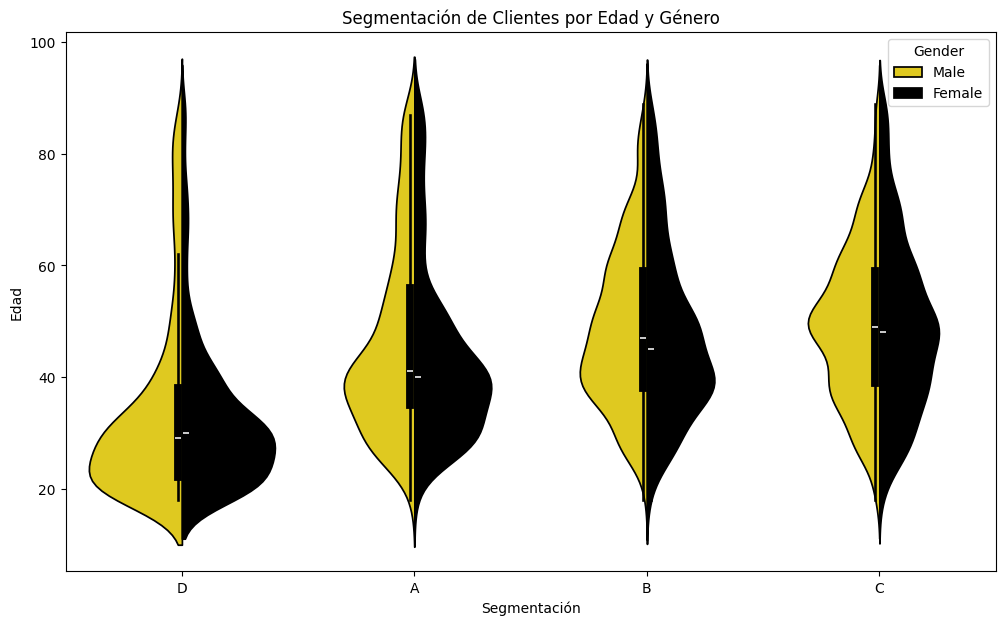

In [ ]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='Segmentation', y='Age', hue='Gender', split=True, data=train, palette = ['#ffe100', 'black'])
plt.title('Segmentación de Clientes por Edad y Género')
plt.xlabel('Segmentación')
plt.ylabel('Edad')
plt.show()

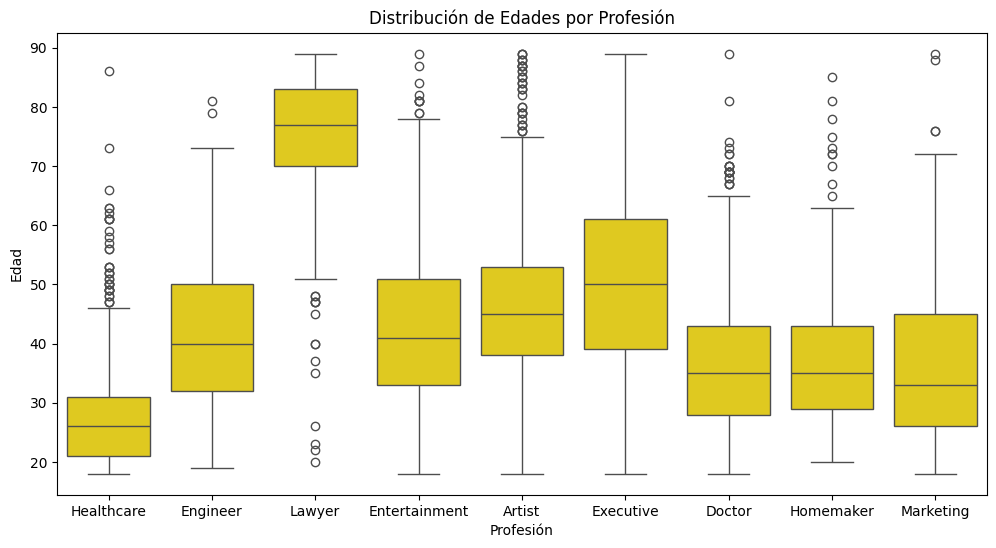

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Profession', y='Age', data=train, color ='#ffe100')
plt.title('Distribución de Edades por Profesión')
plt.xlabel('Profesión')
plt.ylabel('Edad')
plt.show()


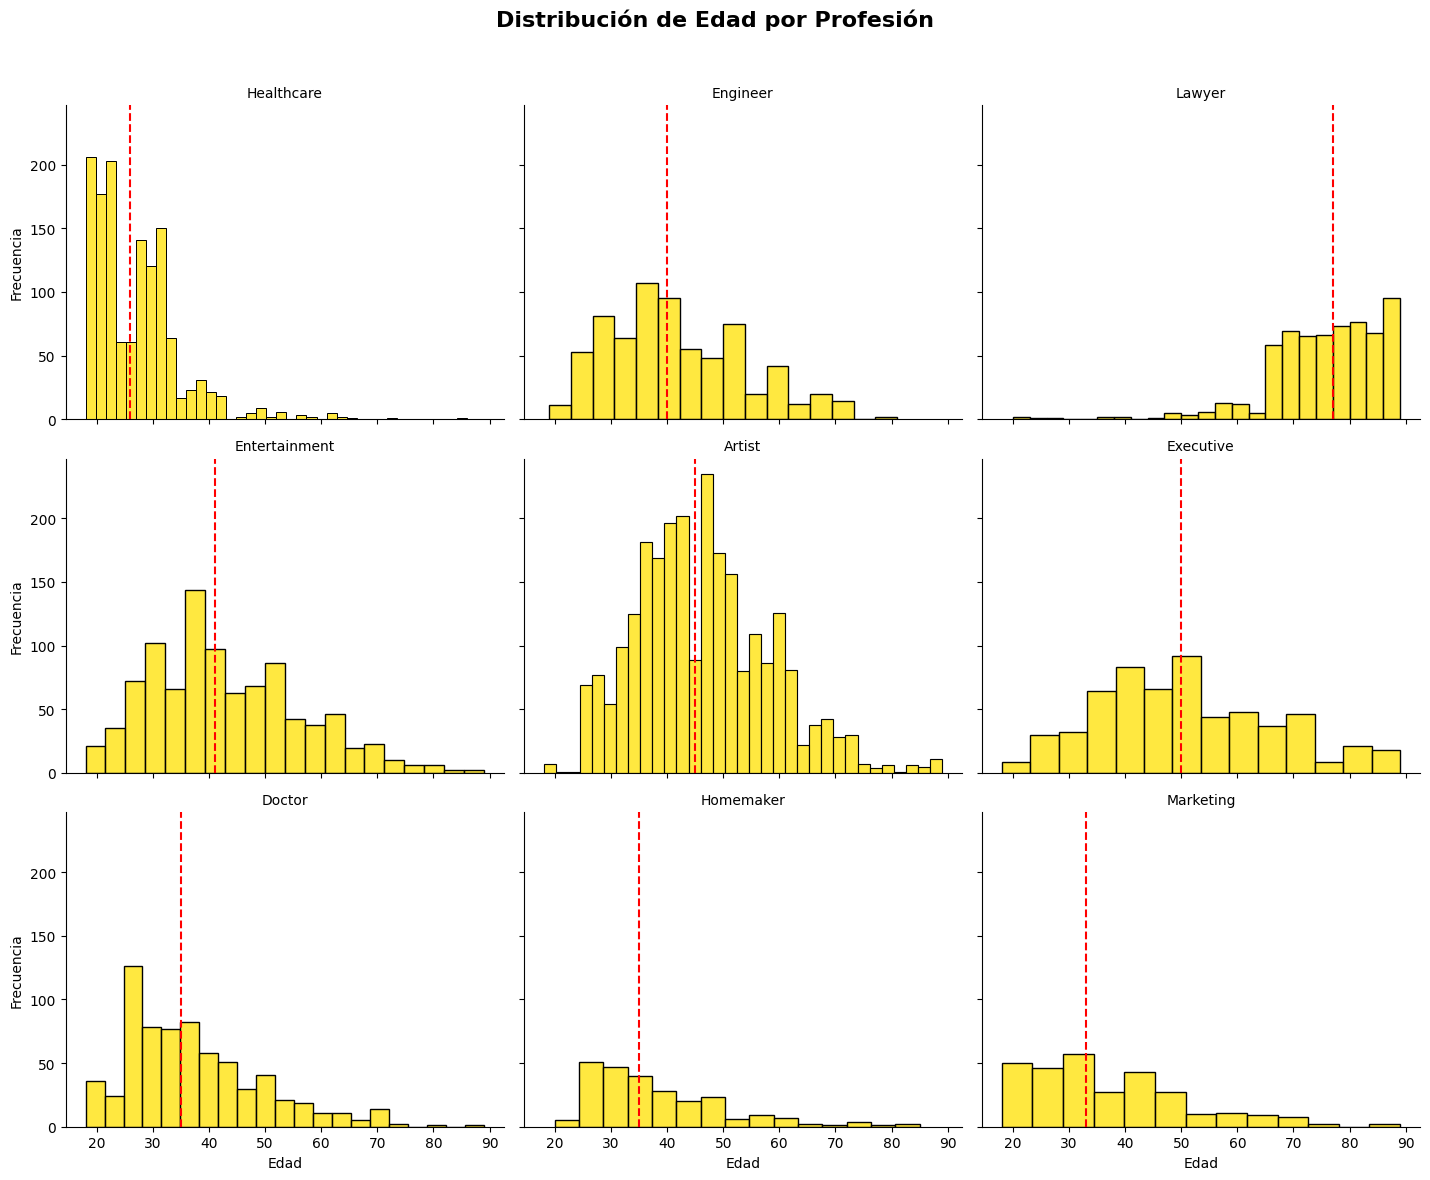

In [ ]:
g = sns.FacetGrid(train, col='Profession', col_wrap=3, height=4, aspect=1.2)

g.map(sns.histplot, 'Age', color='#ffe100', edgecolor='black')
g.fig.suptitle('Distribución de Edad por Profesión', fontsize=16, fontweight='bold')
g.fig.subplots_adjust(top=0.9)

g.set_titles("{col_name}")
g.set_xlabels('Edad')
g.set_ylabels('Frecuencia')

for ax in g.axes.flat:
    median_age = train.loc[train['Profession'] == ax.get_title(), 'Age'].median()
    ax.axvline(median_age, color='red', ls='--')

plt.show()

# **Ahora centremonos en entender los segmentos**

<ipython-input-225-64eee214e5d1>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  sns.countplot(x='Profession', hue='Segmentation', data=train, color='yellow')


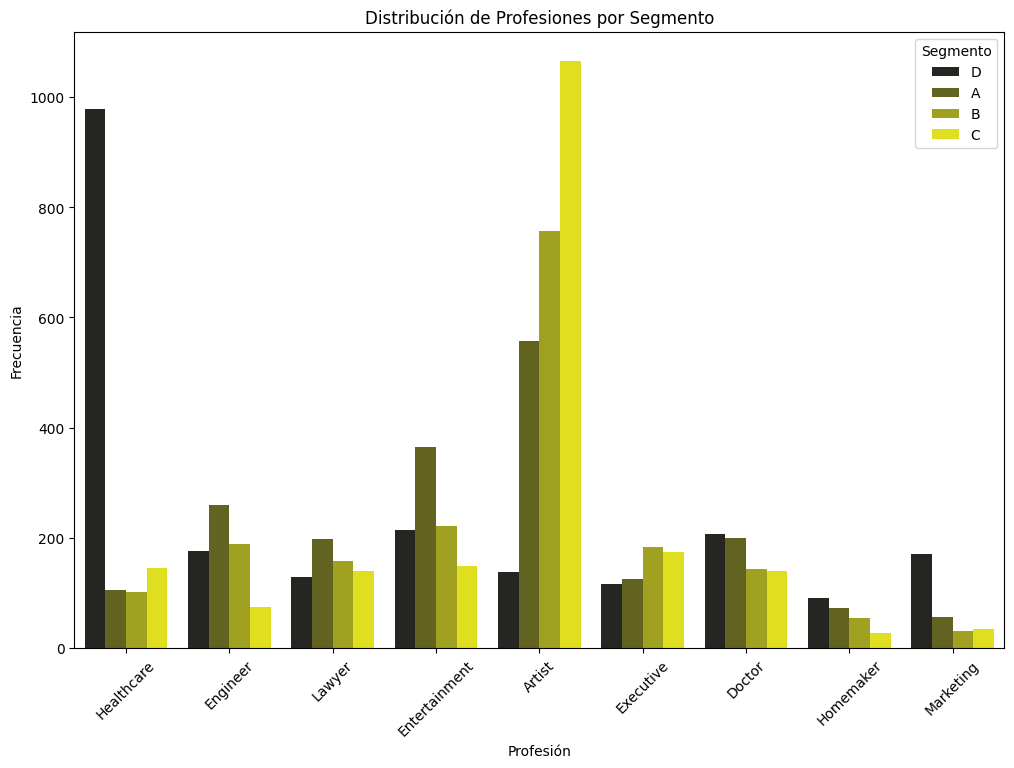

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Profession', hue='Segmentation', data=train, color='yellow')
plt.title('Distribución de Profesiones por Segmento')
plt.xlabel('Profesión')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Segmento')
plt.show()

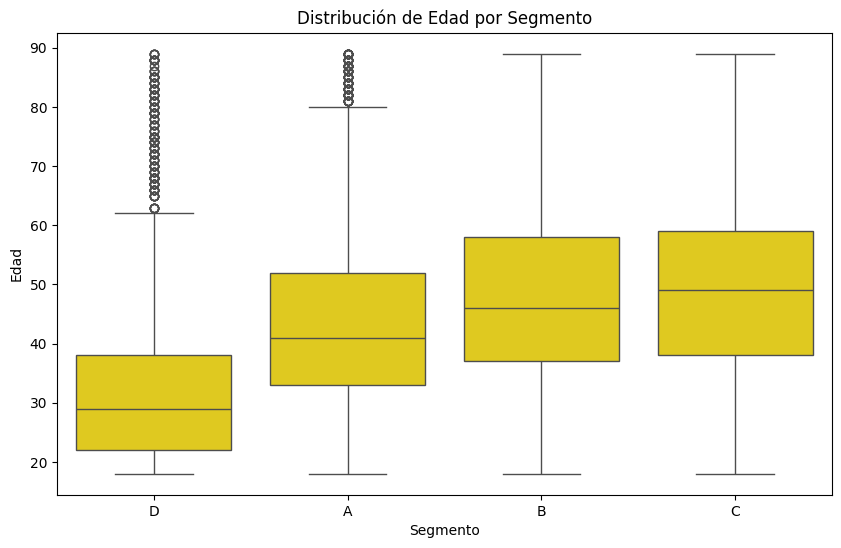

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segmentation', y='Age', data=train, color = '#ffe100')
plt.title('Distribución de Edad por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Edad')
plt.show()

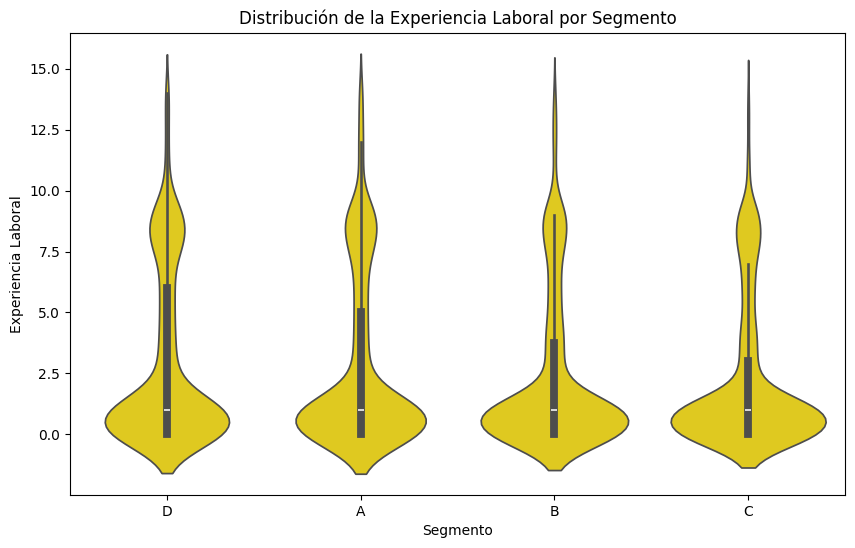

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Segmentation', y='Work_Experience', data=train, color='#ffe100')
plt.title('Distribución de la Experiencia Laboral por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Experiencia Laboral')
plt.show()


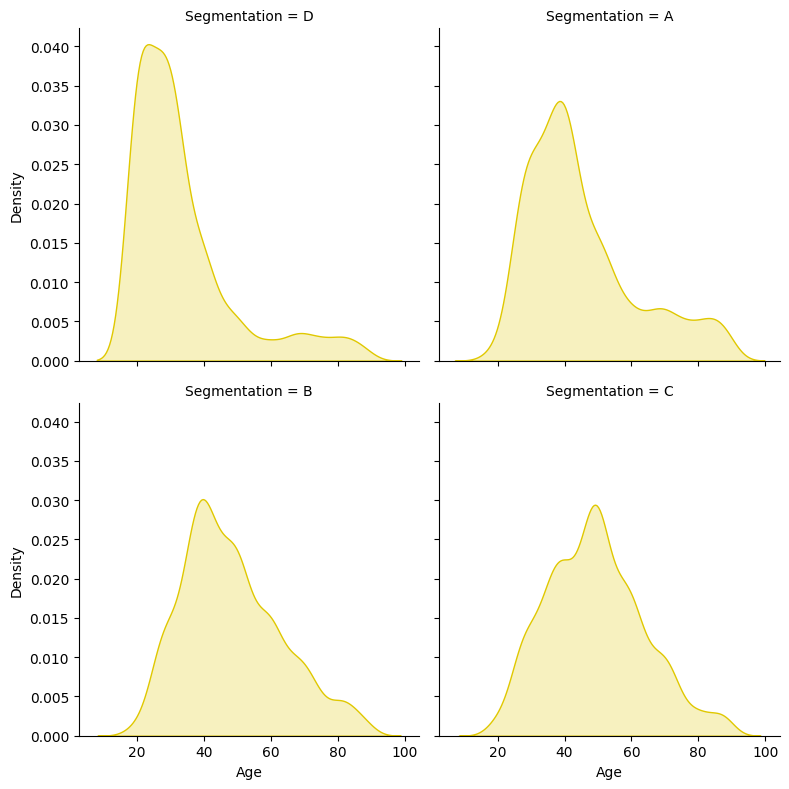

In [ ]:
g = sns.FacetGrid(train, col='Segmentation', height=4, col_wrap=2)
g.map(sns.kdeplot, 'Age', fill=True, color='#E0C800')
plt.show()

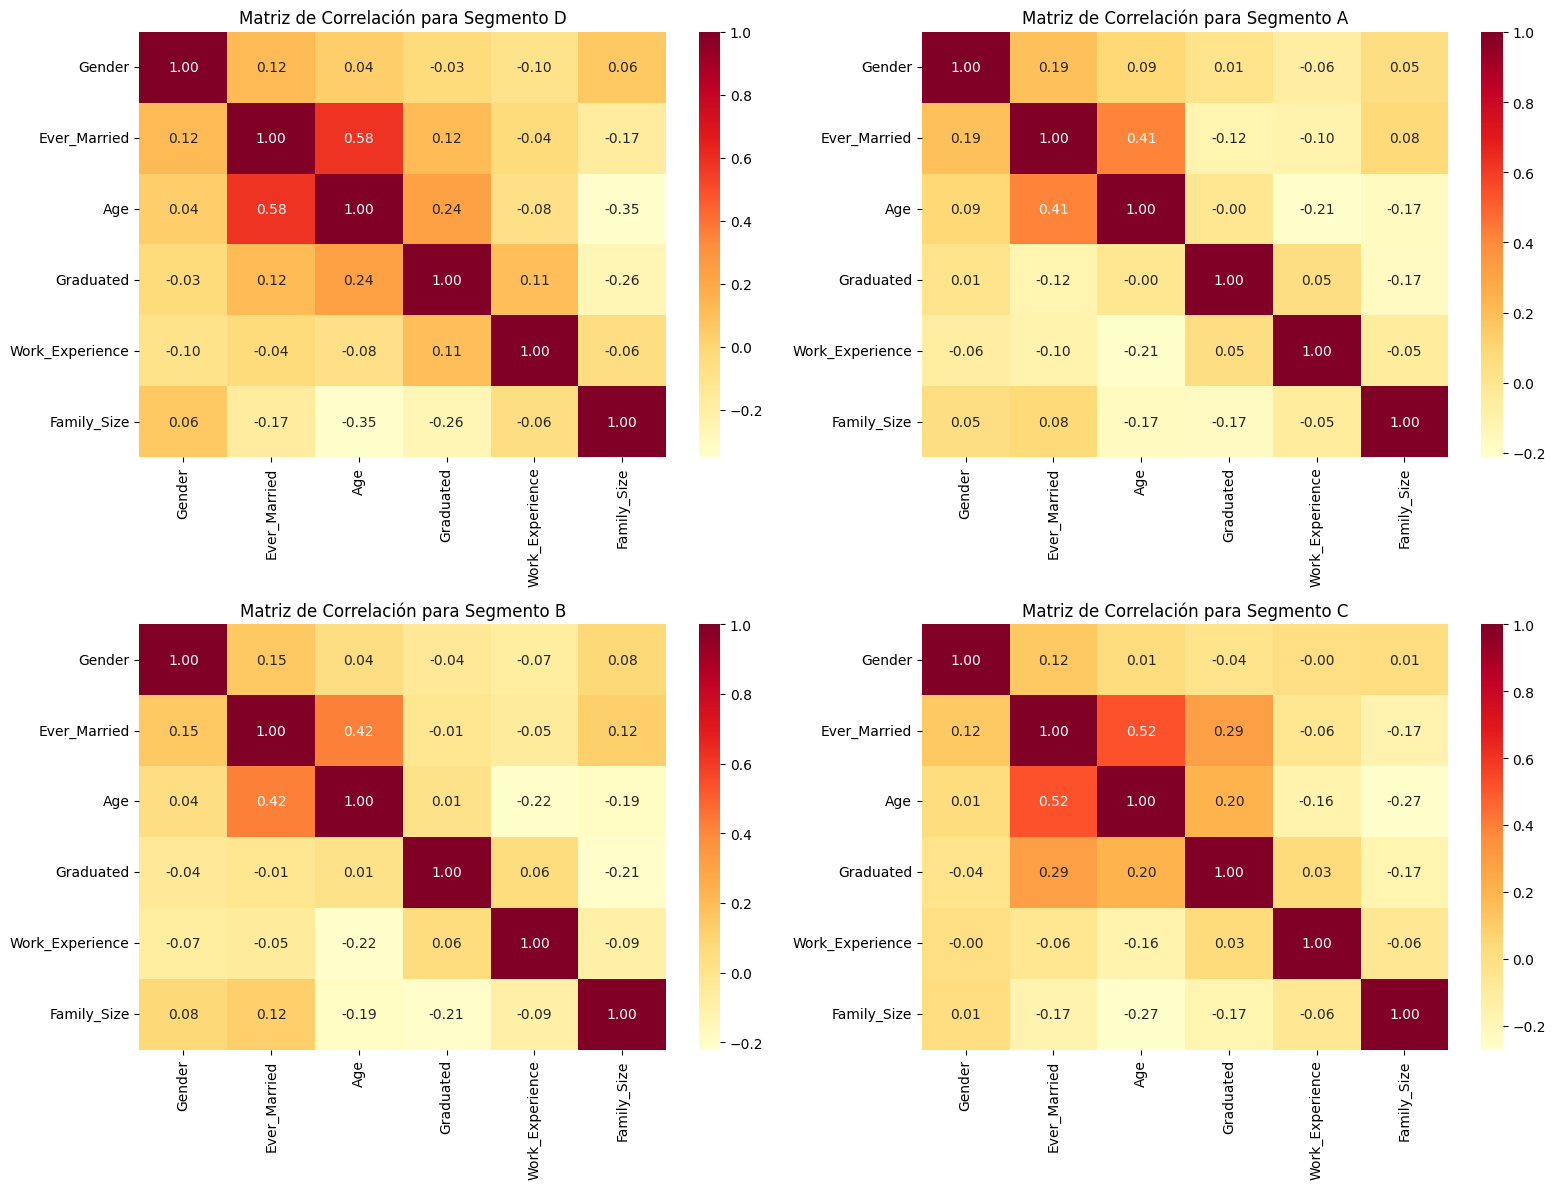

In [ ]:
# Para poder ejecutar este codigo sin fallos necesitamos haber ejecutado primero la codificacion de las variables categorias así podremos crear la matriz. Si el proceso se hace con antelación a esto las matrices tendran
# menos datos ya que solo estamos cogiendo esos datos númericos para llevarla a cabo.
colors = ["#ffffcc", "#ffeda0", "#fed976", "#feb24c", "#fd8d3c", "#fc4e2a", "#e31a1c", "#bd0026", "#800026"]
cmap_yellow = LinearSegmentedColormap.from_list("custom_yellow", colors, N=256)

unique_segments = train['Segmentation'].unique()
num_segments = len(unique_segments)
cols = 2
rows = num_segments // cols + (num_segments % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 8, rows * 6))
axes = axes.flatten()

for i, segment in enumerate(unique_segments):
    segment_data = train[train['Segmentation'] == segment]
    numerical_data = segment_data.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).drop(columns=['ID'], errors='ignore')
    corr_matrix = numerical_data.corr()

    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap_yellow, ax=axes[i])
    axes[i].set_title(f'Matriz de Correlación para Segmento {segment}')

plt.tight_layout()
plt.show()

> **Notamos que hay algunos segmentos con un sesgo más marcado por la edad o por el género que también correlaciona con el hecho de estar o no casado.



# Codificar Variables Categoricas 🔢
Necesario para la matriz de correlación e imprescindible para la aplicación de un modelo predictivo. Primer paso después de haber entendido nuestros datos.

In [ ]:
spending_score_mapping = {'High': 3, 'Average': 2, 'Low': 1}

train['Spending_Score'] = train['Spending_Score'].map(spending_score_mapping)

train['Family_Size'] = (train['Family_Size'] - train['Family_Size'].min()) / (train['Family_Size'].max() - train['Family_Size'].min())

cat_columns = ['Gender', 'Graduated', 'Profession', 'Ever_Married', 'Var_1']

for col in cat_columns:
  train[col] = pd.Categorical(train[col])
  train[col] = train[col].cat.codes
train.to_csv('train_tesla_cat.csv', index = False)

train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,1,0.375,3,D
1,462643,0,1,38,1,2,NaN,2,0.250,3,A
2,466315,0,1,67,1,2,1.0,1,0.000,5,B
3,461735,1,1,67,1,7,0.0,3,0.125,5,B
4,462669,0,1,40,1,3,NaN,3,0.625,5,A


In [ ]:
numerical_columns = ['Family_Size','Ever_Married','Graduated','Work_Experience']

categorical_columns = ['Profession', 'Var_1']

for col in numerical_columns:
  train[col].fillna(train[col].mean(), inplace = True)

for col in categorical_columns:
  train[col].fillna(train[col].mode(), inplace = True)

scaler = MinMaxScaler()

numerical_columns2 = ['Age', 'Work_Experience', 'Spending_Score']
train[numerical_columns2] = scaler.fit_transform(train[numerical_columns2])


train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,0.056338,0,5,0.071429,0.0,0.375,3,D
1,462643,0,1,0.281690,1,2,0.188690,0.5,0.250,3,A
2,466315,0,1,0.690141,1,2,0.071429,0.0,0.000,5,B
3,461735,1,1,0.690141,1,7,0.000000,1.0,0.125,5,B
4,462669,0,1,0.309859,1,3,0.188690,1.0,0.625,5,A


# **Empezamos con el uso del modelo, dividimos**

In [ ]:
y = train['Segmentation']
X = train.drop(['Segmentation','ID'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state= 42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_val.shape}")

X_train shape: (6454, 9)
X_test shape: (1614, 9)
y_train shape: (6454,)
y_test shape: (1614,)


# Accurancy

In [ ]:
model = GradientBoostingClassifier(n_estimators=96, learning_rate=0.1, max_depth=3, random_state=42,
                                   warm_start = True)

model.fit(X_train, y_train)

y_predicted = model.predict(X_val)

accuracy = accuracy_score(y_val, y_predicted) *100
print(f"Accuracy: {accuracy:.4f} %")
print(classification_report(y_val, y_predicted))

Accuracy: 54.0273 %
              precision    recall  f1-score   support

           A       0.44      0.44      0.44       391
           B       0.45      0.36      0.40       369
           C       0.56      0.57      0.56       380
           D       0.65      0.74      0.69       474

    accuracy                           0.54      1614
   macro avg       0.52      0.53      0.52      1614
weighted avg       0.53      0.54      0.53      1614



# Ilustramos como acierta el modelo

Text(95.72222222222221, 0.5, 'Truth')

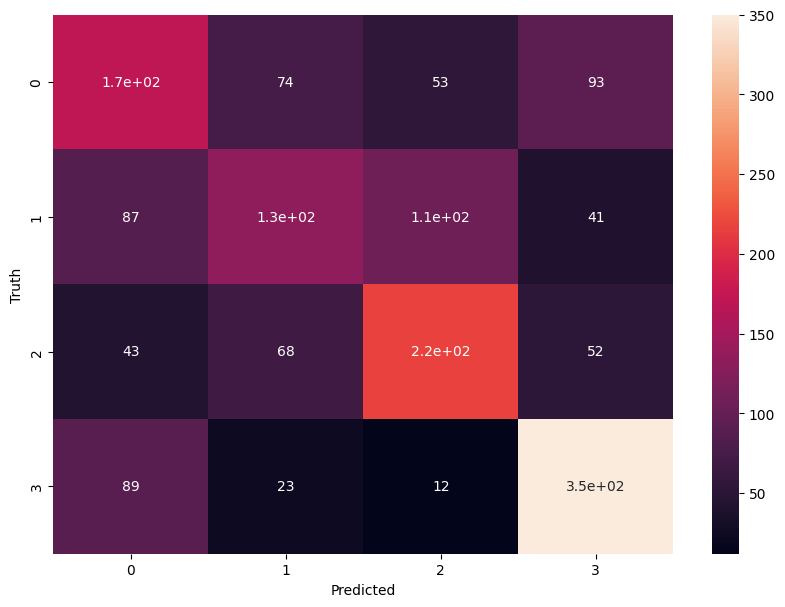

In [ ]:
cm = confusion_matrix(y_val, y_predicted)
cm

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Una vez completado el entrenamiento, debemos aplicar los mismos preprocesos a nuestros nuevos datos para la segmentación

In [ ]:
spending_score_mapping = {'High': 3, 'Average': 2, 'Low': 1}

df_test['Spending_Score'] = df_test['Spending_Score'].map(spending_score_mapping)

df_test['Family_Size'] = (df_test['Family_Size'] - train['Family_Size'].min()) / (train['Family_Size'].max() - train['Family_Size'].min())

cat_columns = ['Gender', 'Graduated', 'Profession', 'Ever_Married', 'Var_1']

for col in cat_columns:
  df_test[col] = pd.Categorical(df_test[col])
  df_test[col] = df_test[col].cat.codes

numerical_columns = ['Family_Size','Ever_Married','Work_Experience', 'Age']

categorical_columns = ['Profession', 'Var_1', 'Gender','Graduated', 'Spending_Score' ]

for col in numerical_columns:
  df_test[col].fillna(train[col].mean(), inplace = True)

for col in categorical_columns:
  df_test[col].fillna(train[col].mode(), inplace = True)

scaler = MinMaxScaler()

numerical_columns2 = ['Age', 'Work_Experience']
df_test[numerical_columns2] = scaler.fit_transform(df_test[numerical_columns2])

test = df_test.round(0)

model = GradientBoostingClassifier(n_estimators=96, learning_rate=0.1, max_depth=3, random_state=42,
                                   warm_start = True)
model.fit(X_train, y_train)

final_hackathon = model.predict(test.drop(['ID'], axis=1, errors='ignore'))

final_hackathon = pd.DataFrame({
    "ID": test["ID"],
    "Segmentation": final_hackathon
})

final_hackathon.to_csv('ResultadosSegmentacion.csv', index=False)